# Load libraries and data sets

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# Load data set "energy consumption in household sector"

path = r'/Users/gomula/Documents/Finalproject'
consump_transport = pd.read_csv(os.path.join(path, '2 Data set', 'Original', 'ten00126_linear.csv','ten00126_linear.csv'), index_col=False)
consump_transport.head()

,DATAFLOW,LAST UPDATE,freq,nrg_bal,siec,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:TEN00126(1.0),14/04/22 11:00:00,A,FC_TRA_E,E7000,KTOE,AL,2009,0.0,NaN
1,ESTAT:TEN00126(1.0),14/04/22 11:00:00,A,FC_TRA_E,E7000,KTOE,AL,2010,0.0,NaN
2,ESTAT:TEN00126(1.0),14/04/22 11:00:00,A,FC_TRA_E,E7000,KTOE,AL,2011,0.0,NaN
3,ESTAT:TEN00126(1.0),14/04/22 11:00:00,A,FC_TRA_E,E7000,KTOE,AL,2012,0.0,NaN
4,ESTAT:TEN00126(1.0),14/04/22 11:00:00,A,FC_TRA_E,E7000,KTOE,AL,2013,0.0,NaN


In [3]:
# remove redundant columns
consump_transport.drop(['DATAFLOW', 'LAST UPDATE', 'freq', 'OBS_FLAG', 'unit'], axis=1, inplace=True)

In [4]:
# define the name of columns
consump_transport.rename(columns={'geo': 'country-code', 'TIME_PERIOD': 'time-period', 'OBS_VALUE': 'value(KTOE)', 'nrg_bal': 'sector'}, inplace=True)

In [5]:
# define the codes of countries and fuels
country_codes = {'SK':'Slovakia', 'FI':'Finland', 'SE':'Sweden', 'IS':'Iceland','NO':'Norway', 'UK':'United Kingdom',
                 'ME': 'Montenegro','MK':'North Macedonia', 'GE':'Georgia', 'EU27_2020':'European Union - 27 countries (from 2020)', 
                 'AL':'Albania', 'RS':'Serbia', 'TR':'Turkey', 'BA':'Bosnia and Herzegovina', 'MD':'Moldova', 'UA':'Ukraine',  
                 'EA19':'Euro area - 19 countries (from 2015)', 'BE':'Belgium', 'BG':'Bulgaria', 'CZ':'Czechia', 'DK':'Denmark',
                 'DE':'Germany', 'EE':'Estonia', 'IE':'Ireland', 'EL':'Greece', 'ES': 'Spain', 'FR':'France', 'HR':'Croatia',
                 'IT':'Italy', 'CY':'Cyprus', 'LV':'Latvia', 'LT':'Lithuania', 'LU':'Luxembourg', 'HU':'Hungary', 'MT':'Malta',
                 'NL':'Netherlands', 'AT':'Austria', 'PL':'Poland', 'PT':'Portugal', 'RO':'Romania', 'SI':'Slovenia',
                 'EU28':'European Union - 28 countries (2013-2020)', 'LI':'Liechtenstein', 'CH':'Switzerland',
                 'XK':'Kosovo'}
len(country_codes)

45

In [6]:
# define the codes of fuels
energy_codes = {'TOTAL':'Total', 'G3000':'Natural gas', 'O4630':'Liquefied petroleum gases', 'O4680':'Fuel oil',
                'O4652XR5210B':'Motor gasoline (excluding biofuel portion)', 'R5300':'Biogases','E7000':'Electricity', 
                'O4671XR5220B':'Gas oil and diesel oil (excluding biofuel portion)','R5220B':'Blended biodiesels',
                'R5210B':'Blended biogasoline', 'R5220P':'Pure biodiesels','R5290':'Other liquid biofuels', 
                'O4661XR5230B': 'Kerosene-type jet fuel (excluding biofuel portion)','R5210P':'Pure biogasoline'}
len(energy_codes)

14

In [7]:
# define code of sectores
sect_codes = {'FC_TRA_E':'transport'}

In [8]:
# replace country abbreviations by full name
consump_transport['country'] = list(map(country_codes.get, consump_transport['country-code'].tolist()))

In [9]:
# replace energy codes by complete name
consump_transport['energy-type'] = list(map(energy_codes.get, consump_transport['siec'].tolist()))

In [10]:
# replace sector abbreviations by full name
consump_transport['sector'] = list(map(sect_codes.get, consump_transport['sector'].tolist()))

In [11]:
# remove columns: siec & country
consump_transport.drop(['siec', 'country-code'], axis=1, inplace=True)

In [18]:
# put columns in order
consump_transport = consump_transport[['country', 'time-period', 'sector','energy-type', 'value(KTOE)']]
consump_transport.head()

,country,time-period,sector,energy-type,value(KTOE)
0,Albania,2009,transport,Electricity,0.0
1,Albania,2010,transport,Electricity,0.0
2,Albania,2011,transport,Electricity,0.0
3,Albania,2012,transport,Electricity,0.0
4,Albania,2013,transport,Electricity,0.0


In [19]:
# shape of the dataset
consump_transport.shape

(6902, 5)

In [20]:
# data type of attributes
consump_transport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6902 entries, 0 to 6901
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      6902 non-null   object 
 1   time-period  6902 non-null   int64  
 2   sector       6902 non-null   object 
 3   energy-type  6902 non-null   object 
 4   value(KTOE)  6902 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 269.7+ KB


There is no null values in dataset

In [21]:
# check for mixed data type in df_ords
for col in consump_transport.columns.tolist():
  weird = (consump_transport[[col]].applymap(type) != consump_transport[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (consump_transport[weird]) > 0:
    print (col + ' contains mixed data types')
  else:
    print (col + ' doesn\'t contain mixed data types')

country doesn't contain mixed data types
time-period doesn't contain mixed data types
sector doesn't contain mixed data types
energy-type doesn't contain mixed data types
value(KTOE) doesn't contain mixed data types


In [22]:
# descriptive statisctics
consump_transport.describe()

,time-period,value(KTOE)
count,6902.000000,6902.000000
mean,2014.567951,2980.768537
std,3.431099,18452.119705
min,2009.000000,0.000000
25%,2012.000000,0.000000
50%,2015.000000,14.549000
75%,2018.000000,404.045250
max,2020.000000,289013.779000


the data distribution for time period is ok as it is the annual data, but in value(KTOE) there are lots of outliers which seems to be rational as they are the summation values

<Axes: ylabel='Frequency'>

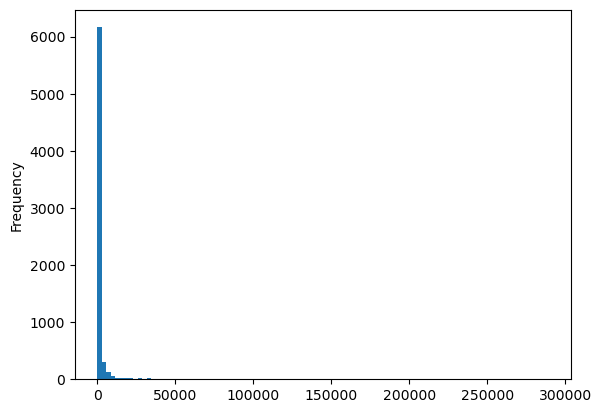

In [23]:
# distribution of value(KTOE)
consump_transport['value(KTOE)'].plot.hist(bins=100)

### Like the other data sets here we have lots of '0' values which seems to be normal as there are lots of unmeasured data or lots of real zero measurements

In [24]:
# value distribution for 'country'
consump_transport['country'].value_counts()

Albania                                      168
Iceland                                      168
Lithuania                                    168
Luxembourg                                   168
Latvia                                       168
Montenegro                                   168
North Macedonia                              168
Malta                                        168
Netherlands                                  168
Norway                                       168
Poland                                       168
Portugal                                     168
Romania                                      168
Serbia                                       168
Sweden                                       168
Slovenia                                     168
Slovakia                                     168
Turkey                                       168
Ukraine                                      168
Austria                                      168
Italy               

In [26]:
# data distribution for 'energy-type'
consump_transport['energy-type'].value_counts()

Electricity                                           493
Natural gas                                           493
Liquefied petroleum gases                             493
Motor gasoline (excluding biofuel portion)            493
Kerosene-type jet fuel (excluding biofuel portion)    493
Gas oil and diesel oil (excluding biofuel portion)    493
Fuel oil                                              493
Blended biogasoline                                   493
Pure biogasoline                                      493
Blended biodiesels                                    493
Pure biodiesels                                       493
Other liquid biofuels                                 493
Biogases                                              493
Total                                                 493
Name: energy-type, dtype: int64

In [27]:
# data distribution for sector
consump_transport['sector'].value_counts()

transport    6902
Name: sector, dtype: int64

In [28]:
# remove rows related to 'EU27_2020' & 'EA19' & 'EA28' as they are summations for contries in EU and they are not helpful in our analysis
consump_transport.drop(consump_transport[consump_transport['country'].isin(['European Union - 27 countries (from 2020)',
            'Euro area - 19 countries (from 2015)', 'European Union - 28 countries (2013-2020)'])].index, inplace=True)
set(consump_transport['country'])

{'Albania',
 'Austria',
 'Belgium',
 'Bosnia and Herzegovina',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Hungary',
 'Iceland',
 'Ireland',
 'Italy',
 'Kosovo',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Moldova',
 'Montenegro',
 'Netherlands',
 'North Macedonia',
 'Norway',
 'Poland',
 'Portugal',
 'Romania',
 'Serbia',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'Turkey',
 'Ukraine',
 'United Kingdom'}

In [29]:
# check for null values again
consump_transport.isnull().sum()

country        0
time-period    0
sector         0
energy-type    0
value(KTOE)    0
dtype: int64

In [30]:
# check for duplicity
consump_transport[consump_transport.duplicated()]

,country,time-period,sector,energy-type,value(KTOE)


### There is no duplicated row

In [31]:
# reset index for new dataset
consump_transport.reset_index(drop=True, inplace=True)
consump_transport

,country,time-period,sector,energy-type,value(KTOE)
0,Albania,2009,transport,Electricity,0.000
1,Albania,2010,transport,Electricity,0.000
2,Albania,2011,transport,Electricity,0.000
3,Albania,2012,transport,Electricity,0.000
4,Albania,2013,transport,Electricity,0.000
...,...,...,...,...,...
6561,Kosovo,2016,transport,Total,395.981
6562,Kosovo,2017,transport,Total,410.191
6563,Kosovo,2018,transport,Total,429.875
6564,Kosovo,2019,transport,Total,428.184


# The final form of the 'consum_transport' data frame will be as follow

In [32]:
consump_transport.head()

,country,time-period,sector,energy-type,value(KTOE)
0,Albania,2009,transport,Electricity,0.0
1,Albania,2010,transport,Electricity,0.0
2,Albania,2011,transport,Electricity,0.0
3,Albania,2012,transport,Electricity,0.0
4,Albania,2013,transport,Electricity,0.0


In [33]:
consump_transport.shape

(6566, 5)

In [34]:
consump_transport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6566 entries, 0 to 6565
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      6566 non-null   object 
 1   time-period  6566 non-null   int64  
 2   sector       6566 non-null   object 
 3   energy-type  6566 non-null   object 
 4   value(KTOE)  6566 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 256.6+ KB


In [35]:
consump_transport.describe()

,time-period,value(KTOE)
count,6566.000000,6566.000000
mean,2014.571429,1305.462558
std,3.429987,5114.612552
min,2009.000000,0.000000
25%,2012.000000,0.000000
50%,2015.000000,10.282000
75%,2018.000000,307.238000
max,2020.000000,57247.225000


<Axes: ylabel='Frequency'>

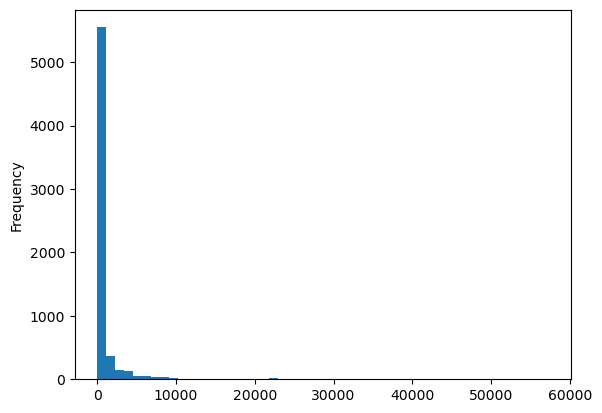

In [36]:
consump_transport['value(KTOE)'].plot.hist(bins=50)

In [37]:
# Save data set in pickle and csv formats
consump_transport.to_csv(os.path.join(path, '2 Data set', 'Modified', 'consump_transport.csv'))
consump_transport.to_pickle(os.path.join(path, '2 Data set', 'Modified', 'consump_transport.pkl'))